In [1]:
print("Hello world")

Hello world


In [4]:
import numpy as np
import matplotlib.pyplot as mlt
import pandas as pd 

# imported libraries

In [ ]:
# #clean per-capita-meat-type.csv
# import pandas as pd

# meat_df = pd.read_csv("datasets/original datasets/per-capita-meat-type.csv")
# codes_df = pd.read_csv("datasets/codes.csv")

# merged = pd.merge(meat_df, codes_df, left_on="Code", right_on="alpha-3", how="left")

# filtered = merged[merged["region"].isin(["Asia", "Europe"])]

# latest = filtered.sort_values("Year").groupby("Code").tail(1)

# meat_columns = [col for col in latest.columns if col.startswith("Meat")]
# latest["Total_Meat_kg_per_capita"] = latest[meat_columns].sum(axis=1)

# final_df = latest[["Entity", "Code", "Year", "region", "Total_Meat_kg_per_capita"] + meat_columns]

# final_df.to_csv("asia_europe_meat_consumption.csv", index=False)

# print(final_df["region"].value_counts())


region
Asia      48
Europe    39
Name: count, dtype: int64


In [6]:
codes = pd.read_csv("datasets\codes.csv")
meat_consumption = pd.read_csv("datasets\meat_consumption_worldwide.csv")
michelin = pd.read_csv("datasets\michelin.csv")

print(codes.head())
print(meat_consumption.head())
print(michelin.head())

             name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       Na

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\takoo\AppData\Local\Temp\ipykernel_23604\2821011415.py:1: SyntaxWarning: invalid escape sequence '\c'
  codes = pd.read_csv("datasets\codes.csv")
C:\Users\takoo\AppData\Local\Temp\ipykernel_23604\2821011415.py:2: SyntaxWarning: invalid escape sequence '\m'
  meat_consumption = pd.read_csv("datasets\meat_consumption_worldwide.csv")
C:\Users\takoo\AppData\Local\Temp\ipykernel_23604\2821011415.py:3: SyntaxWarning: invalid escape sequence '\m'
  michelin = pd.read_csv("datasets\michelin.csv")


In [ ]:
# CLEANUP - Michelin, to only include European and Asian restaurants.
# Take the country dataset
# Fix it for South Korea
# Only take countries found in the list of countries in codes (this will be only europe and asia)

# Mapping mismatches from michelin country names to ISO-style names in codes
country_replacements = {
    "Schweiz": "Switzerland",
    "Suisse": "Switzerland",
    "Svizzera": "Switzerland",
    "South Korea": "Korea, Republic of",
    "Deutschland": "Germany",
    "Taipei & Taichung": "Taiwan, Province of China",
    "United States": "United States of America",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "Macau": "Macao",
    "China Mainland": "China",
    "Nederland": "Netherlands, Kingdom of the",
    "Россия": "Russian Federation"
}

# Apply replacements
michelin['country'] = michelin['country'].replace(country_replacements)

# Filter to only countries that exist in codes['name']
filtered_michelin = michelin[michelin['country'].isin(codes['name'])]

european_countries = codes[codes['region'] == 'Europe']['name']
asian_countries = codes[codes['region'] == 'Asia']['name']
# Filter by European or Asian
# Select all rows in filtered michelin where the country column's value is associated with the Europe region in the coes.csv
european_michelin = michelin[michelin['country'].isin(european_countries)]
asian_michelin = michelin[michelin['country'].isin(asian_countries)]

In [ ]:
# What we are going to do is use bootstrap sampling on the correlation between meat consumption and michlein star count.
# The rationale here is as such:
# Each COUNTRY has two VALUES. These VALUES are MEAT CONSUMPTION and MICHELIN COUNT (this can be either count of restaurants or count of stars.)
# We divide the two groups of countries into ASIAN and EUROPEAN.

In [12]:
# We merge the 3 datasets together so that we have a single dataframe with the following columns:
# country
# michelin_count 
# region
# Total_Meat_kg_per_capita
# so that we have all required variables in one table which makes permutation, bootstrapping and linear regression easier
import pandas as pd

michelin = pd.read_csv("datasets/michelin.csv")
codes = pd.read_csv("datasets/codes.csv")
meat = pd.read_csv("datasets/asia_europe_meat_consumption.csv")

country_replacements = {
    "Schweiz": "Switzerland",
    "Suisse": "Switzerland",
    "Svizzera": "Switzerland",
    "South Korea": "Korea, Republic of",
    "Deutschland": "Germany",
    "Taipei & Taichung": "Taiwan, Province of China",
    "United States": "United States of America",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "Macau": "Macao",
    "China Mainland": "China",
    "Nederland": "Netherlands, Kingdom of the",
    "Россия": "Russian Federation"
}
michelin['country'] = michelin['country'].replace(country_replacements)
filtered_michelin = michelin[michelin['country'].isin(codes['name'])]
european_countries = codes[codes['region'] == 'Europe']['name']
asian_countries = codes[codes['region'] == 'Asia']['name']
filtered_michelin = filtered_michelin[
    filtered_michelin['country'].isin(european_countries) |
    filtered_michelin['country'].isin(asian_countries)
]
michelin_counts = (
    filtered_michelin.groupby('country')
    .size()
    .reset_index(name='michelin_count')
)
michelin_with_region = michelin_counts.merge(
    codes[['name', 'region']],
    left_on='country',
    right_on='name',
    how='left'
).drop(columns=['name'])
meat['Entity'] = meat['Entity'].replace(country_replacements)

meat_clean = meat[['Entity', 'Total_Meat_kg_per_capita']]

merged_df = michelin_with_region.merge(
    meat_clean,
    left_on='country',
    right_on='Entity',
    how='inner'
).drop(columns=['Entity'])

print(merged_df.head())
merged_df.to_csv("merged_data.csv", index=False)
#print how many total countrys there are by region
print("Total countries in Europe:", merged_df[merged_df['region'] == 'Europe'].shape[0])
print("Total countries in Asia:", merged_df[merged_df['region'] == 'Asia'].shape[0])


   country  michelin_count  region  Total_Meat_kg_per_capita
0  Austria              18  Europe                 76.884831
1  Belgium             125  Europe                 64.558488
2    China             107    Asia                 70.004751
3  Croatia              10  Europe                 97.143633
4  Denmark              27  Europe                 66.796232
Total countries in Europe: 22
Total countries in Asia: 6


       Total_Meat_kg_per_capita                                              \
                          count       mean        std        min        25%   
region                                                                        
Asia                        6.0  79.115165  35.639996  25.916176  62.437039   
Europe                     22.0  78.583137  11.966987  60.563023  69.030241   

                                          michelin_count              \
              50%         75%         max          count        mean   
region                                                                 
Asia    76.729219  104.617354  123.729998            6.0  110.500000   
Europe  77.798357   85.177112  104.159300           22.0   95.909091   

                                                     
               std   min   25%   50%     75%    max  
region                                               
Asia    148.551338  15.0  32.0  51.5   98.00  406.0  
Europe  157.659038   1.0   

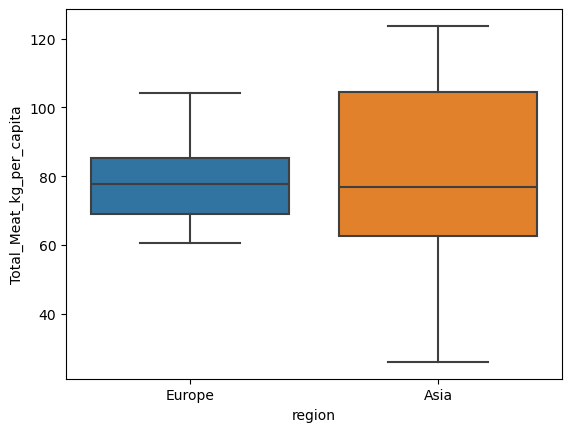

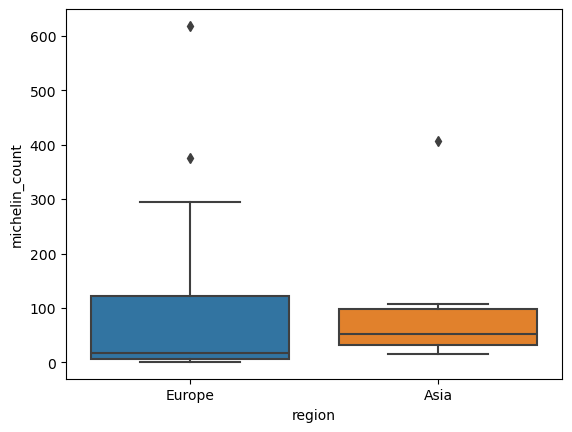

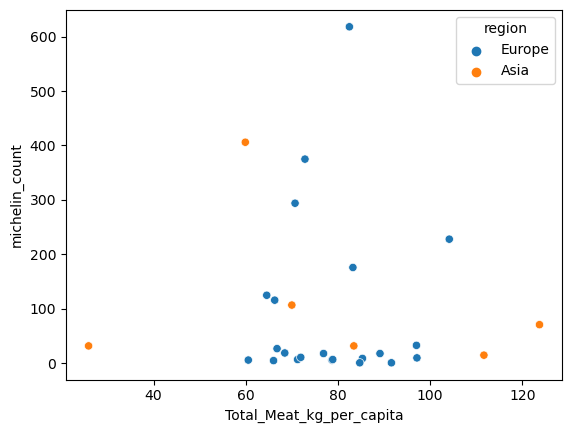

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load merged data
df = pd.read_csv("merged_data.csv")

# Summary statistics
print(df.groupby("region")[["Total_Meat_kg_per_capita", "michelin_count"]].describe())

# Boxplots
sns.boxplot(x="region", y="Total_Meat_kg_per_capita", data=df)
plt.show()

sns.boxplot(x="region", y="michelin_count", data=df)
plt.show()

# Scatterplot
sns.scatterplot(
    data=df,
    x="Total_Meat_kg_per_capita",
    y="michelin_count",
    hue="region"
)
plt.show()


region
Europe    22
Asia       6
Name: count, dtype: int64


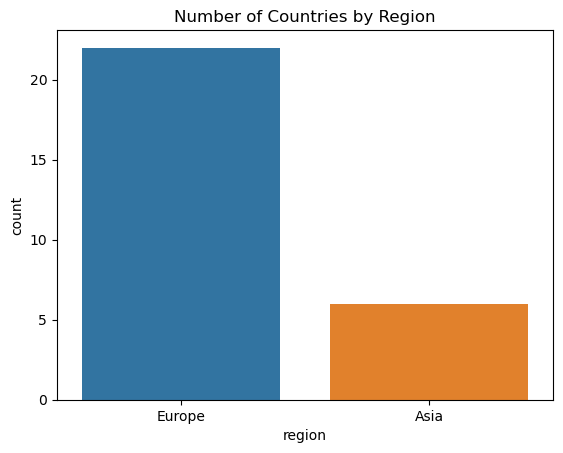

       Total_Meat_kg_per_capita                                              \
                          count       mean        std        min        25%   
region                                                                        
Asia                        6.0  79.115165  35.639996  25.916176  62.437039   
Europe                     22.0  78.583137  11.966987  60.563023  69.030241   

                                          michelin_count              \
              50%         75%         max          count        mean   
region                                                                 
Asia    76.729219  104.617354  123.729998            6.0  110.500000   
Europe  77.798357   85.177112  104.159300           22.0   95.909091   

                                                     
               std   min   25%   50%     75%    max  
region                                               
Asia    148.551338  15.0  32.0  51.5   98.00  406.0  
Europe  157.659038   1.0   

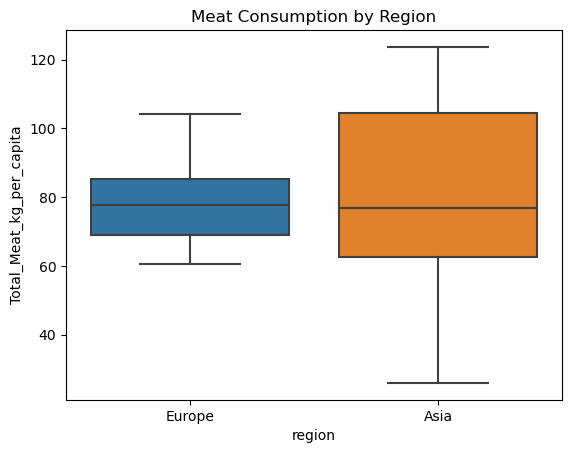

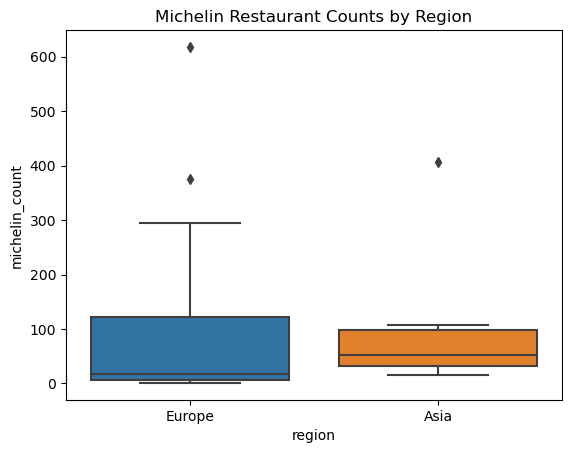

c:\Users\jingk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


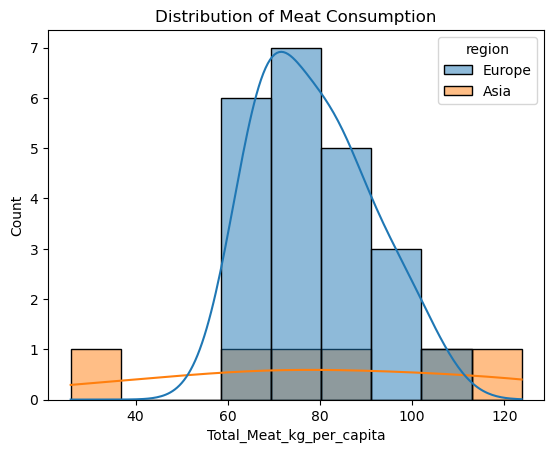

c:\Users\jingk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


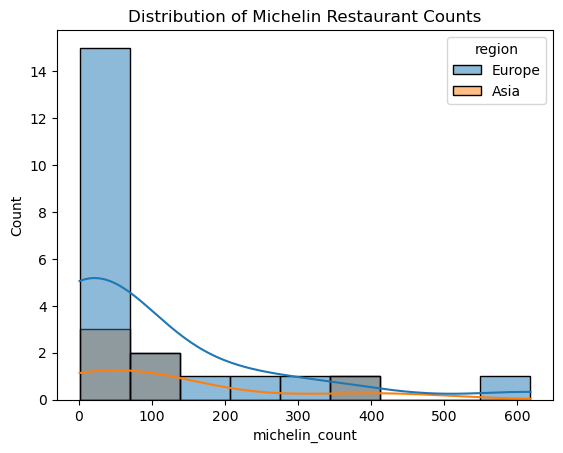

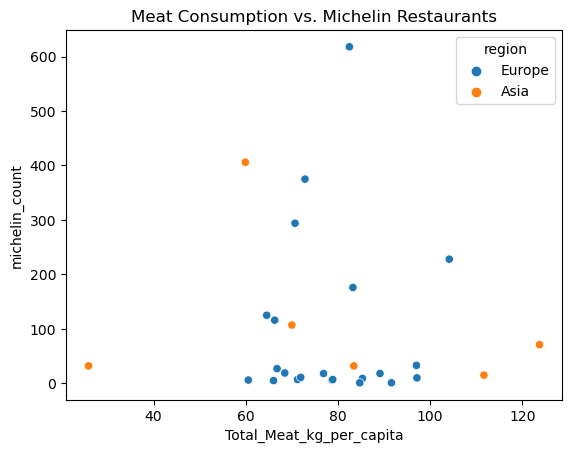

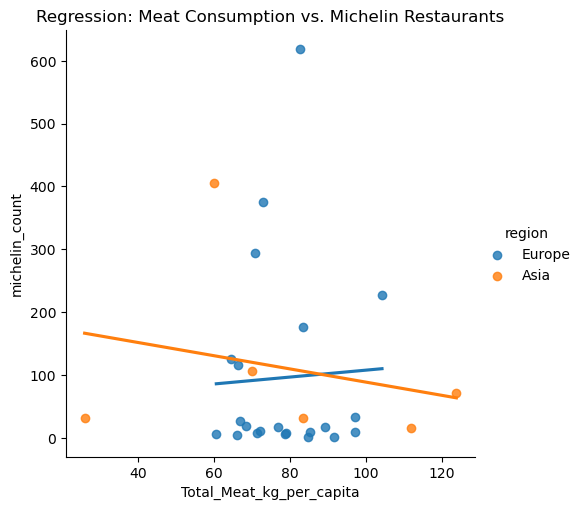

   country  michelin_count  region  Total_Meat_kg_per_capita
6   France             618  Europe                 82.492909
14   Japan             406    Asia                 59.914468
     country  michelin_count region  Total_Meat_kg_per_capita
9  Hong Kong              71   Asia                123.729998


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("datasets/merged_data.csv")

#  countries in each region
region_counts = df['region'].value_counts()
print(region_counts)

#  country count by region
sns.countplot(x='region', data=df)
plt.title("Number of Countries by Region")
plt.show()

summary_stats = df.groupby("region")[["Total_Meat_kg_per_capita", "michelin_count"]].describe()
print(summary_stats)

# meat by region
sns.boxplot(x="region", y="Total_Meat_kg_per_capita", data=df)
plt.title("Meat Consumption by Region")
plt.show()

#  michelin by region
sns.boxplot(x="region", y="michelin_count", data=df)
plt.title("Michelin Restaurant Counts by Region")
plt.show()


# hist for meat consumption
sns.histplot(data=df, x="Total_Meat_kg_per_capita", hue="region", kde=True)
plt.title("Distribution of Meat Consumption")
plt.show()

# hist for no of muichrlin
sns.histplot(data=df, x="michelin_count", hue="region", kde=True)
plt.title("Distribution of Michelin Restaurant Counts")
plt.show()

sns.scatterplot(
    data=df,
    x="Total_Meat_kg_per_capita",
    y="michelin_count",
    hue="region"
)
plt.title("Meat Consumption vs. Michelin Restaurants")
plt.show()

sns.lmplot(
    data=df,
    x="Total_Meat_kg_per_capita",
    y="michelin_count",
    hue="region",
    ci=None
)
plt.title("Regression: Meat Consumption vs. Michelin Restaurants")
plt.show()

# countries with peak michelin restaurants
print(df[df['michelin_count'] > df['michelin_count'].mean() + 2*df['michelin_count'].std()])

# countries with high meat consumption
print(df[df['Total_Meat_kg_per_capita'] > df['Total_Meat_kg_per_capita'].mean() + 2*df['Total_Meat_kg_per_capita'].std()])
